In [1]:

from PIL import Image

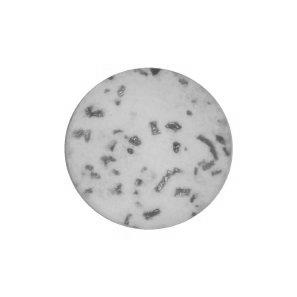

In [2]:
im = Image.open("data_grayscale/test/images/229.jpg")
im

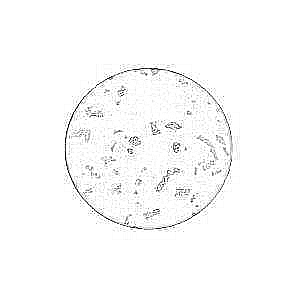

In [4]:
#im = Image.open("data_grayscale/test/images/229.jpg")


from PIL import Image, ImageFilter, ImageOps

im = Image.open("data_grayscale/test/images/229.jpg")
#image = im.filter(ImageFilter.FIND_EDGES)
image = im.filter(ImageFilter.CONTOUR)
#image.save('new_name.png') 
image

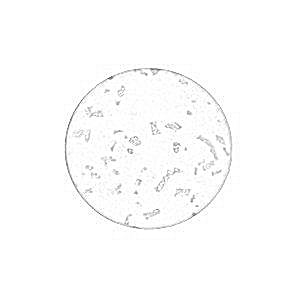

In [54]:
import numpy
import PIL

im = Image.open("data_grayscale/test/images/229.jpg")

#im = im.filter(ImageFilter.FIND_EDGES)
#im = im.filter(ImageFilter.CONTOUR)
im = im.filter(ImageFilter.SMOOTH)
im = im.filter(ImageFilter.CONTOUR)

#im = im.filter(ImageFilter.FIND_EDGES)
#im = im.filter(ImageFilter.EDGE_ENHANCE)
#im = im.convert('1') #, dither=Image.NONE)
im

(297, 297)


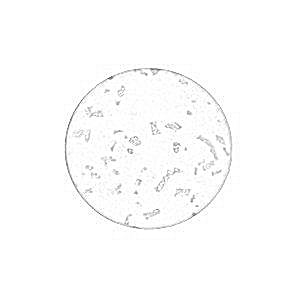

In [55]:
im = Image.open("data_grayscale/test/images/229.jpg")
#image = im.filter(ImageFilter.FIND_EDGES)
im = im.filter(ImageFilter.SMOOTH)
im = im.filter(ImageFilter.CONTOUR)
#im = im.filter(ImageFilter.EDGE_ENHANCE)
#im = im.convert('1', dither=Image.NONE)

arr = numpy.array(im)
print(arr.shape)


# Convert array to Image
im = PIL.Image.fromarray(arr)

#image.save('new_name.png') 
im

(297, 297)


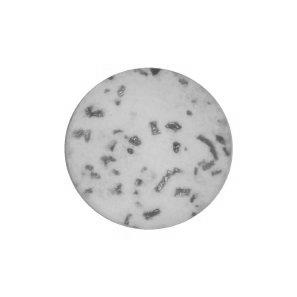

In [87]:
import numpy
import PIL
 
# Convert PIL Image to NumPy array
img = Image.open("data_grayscale/test/images/229.jpg")
arr = numpy.array(img)
print(arr.shape)
#arr[arr < 128] = 0
#bw[bw < 128] = 0    # Black
#bw[bw >= 24] = 255 # White

 
# Convert array to Image
img = PIL.Image.fromarray(arr)
img

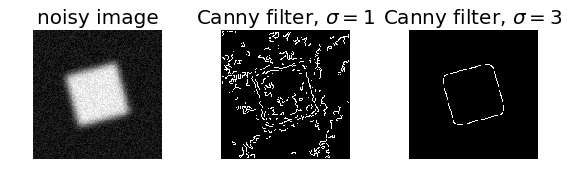

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)




# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

85953
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


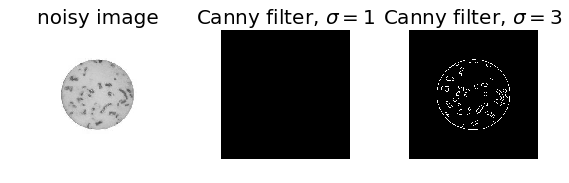

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Load an image
im = Image.open("data_grayscale/test/images/229.jpg")
arr = numpy.array(img)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(arr)
edges2 = feature.canny(arr, sigma=2)

print(len(edges1[edges1==False]))
edges1[edges1==False]=255
edges1[edges1==True]=0
#edges1[edges1==128]=0
#print(len(edges1[edges1==128]))
print(edges1)
arr[arr < 128] = 0


# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

In [6]:
def image_to_grayscale_by_filepath(src,dest):

    im = Image.open(src).convert('1', dither=Image.NONE)
    im.save(dest)
    

In [ ]:
def image_to_grayscale_by_filepath(src,dest):

    im = Image.open(src).convert('1', dither=Image.NONE)

    im = Image.open("data_grayscale/test/images/229.jpg")
    #image = im.filter(ImageFilter.FIND_EDGES)
    im = im.filter(ImageFilter.SMOOTH)
    im = im.filter(ImageFilter.CONTOUR)
    im.save(dest)

In [10]:
import os, shutil
from random import randint

root_src_dir = 'data_with_rotations/'    #Path/Location of the source directory
root_dst_dir = 'data_bw_with_rotations/'  #Path to the destination folder

for src_dir, dirs, files in os.walk(root_src_dir):
    dst_dir = src_dir.replace(root_src_dir, root_dst_dir, 1)
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)
    for file_ in files:
        if file_ != '.DS_Store':
            src_file = os.path.join(src_dir, file_)
            dst_file = os.path.join(dst_dir, file_)
            if os.path.exists(dst_file):
                os.remove(dst_file)
            image_to_grayscale_by_filepath(src_file,dst_file)
        